# Análisis exploratorio de datos.
<mark>*Con datos climaticos del INTA*</mark>

In [1]:
# Módulos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# opciones
pd.set_option("display.max_columns", 100)
sns.set()

In [2]:
df, df_estaciones = pd.read_parquet('../data/datos-todas-estaciones.parquet'), pd.read_csv('../data/estaciones-meteorologicas-inta.csv')

df.shape, df_estaciones.shape

((923867, 38), (169, 12))

Para comenzar a explorar los datos, debemos conocer las siguientes estadisticas:

- Revisar dimensiones: `shape` (número de filas y columnas).  
- Ver primeras y últimas filas: `head()`, `tail()`.  
- Tipos de datos: `dtypes`, `info()`.  
- Identificar variables: **categóricas, numéricas, de fecha, texto**.  

In [3]:
df.shape

(923867, 38)

In [4]:
df.head()

,Fecha,Temperatura_Abrigo_150cm,Temperatura_Abrigo_150cm_Maxima,Temperatura_Abrigo_150cm_Minima,Temperatura_Intemperie_5cm_Minima,Temperatura_Intemperie_50cm_Minima,Temperatura_Suelo_5cm_Media,Temperatura_Suelo_10cm_Media,Temperatura_Inte_5cm,Temperatura_Intemperie_150cm_Minima,Humedad_Suelo,Precipitacion_Pluviometrica,Precipitacion_Cronologica,Precipitacion_Maxima_30minutos,Heliofania_Efectiva,Heliofania_Relativa,Tesion_Vapor_Media,Humedad_Media,Humedad_Media_8_14_20,Rocio_Medio,Duracion_Follaje_Mojado,Velocidad_Viento_200cm_Media,Direccion_Viento_200cm,Velocidad_Viento_1000cm_Media,Direccion_Viento_1000cm,Velocidad_Viento_Maxima,Presion_Media,Radiacion_Global,Horas_Frio,Unidades_Frio,id_estacion,Granizo,Nieve,Radiacion_Neta,Evaporacion_Tanque,Evapotranspiracion_Potencial,Profundidad_Napa,Unidad_Frio
0,2009-08-06 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-08-07 00:00:00.0,9.572915,12.3,7.3,NaN,NaN,NaN,9.702779,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,9.712307,83.0,81.0,6.544751,NaN,NaN,,NaN,,NaN,NaN,NaN,1.494000,NaN,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-08-08 00:00:00.0,8.314584,17.4,1.7,NaN,NaN,NaN,9.373611,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,8.052779,81.0,77.0,3.762041,NaN,NaN,,NaN,,NaN,NaN,NaN,13.612010,13.363010,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-08-09 00:00:00.0,7.433333,17.1,0.8,NaN,NaN,NaN,8.793056,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,7.681013,77.0,73.0,3.135792,NaN,NaN,,NaN,,NaN,NaN,NaN,13.944010,13.944010,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-08-10 00:00:00.0,11.295140,22.2,3.9,NaN,NaN,NaN,8.979861,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,7.810816,58.0,52.0,3.396338,NaN,NaN,,NaN,,NaN,NaN,NaN,7.801996,3.236999,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,Fecha,Temperatura_Abrigo_150cm,Temperatura_Abrigo_150cm_Maxima,Temperatura_Abrigo_150cm_Minima,Temperatura_Intemperie_5cm_Minima,Temperatura_Intemperie_50cm_Minima,Temperatura_Suelo_5cm_Media,Temperatura_Suelo_10cm_Media,Temperatura_Inte_5cm,Temperatura_Intemperie_150cm_Minima,Humedad_Suelo,Precipitacion_Pluviometrica,Precipitacion_Cronologica,Precipitacion_Maxima_30minutos,Heliofania_Efectiva,Heliofania_Relativa,Tesion_Vapor_Media,Humedad_Media,Humedad_Media_8_14_20,Rocio_Medio,Duracion_Follaje_Mojado,Velocidad_Viento_200cm_Media,Direccion_Viento_200cm,Velocidad_Viento_1000cm_Media,Direccion_Viento_1000cm,Velocidad_Viento_Maxima,Presion_Media,Radiacion_Global,Horas_Frio,Unidades_Frio,id_estacion,Granizo,Nieve,Radiacion_Neta,Evaporacion_Tanque,Evapotranspiracion_Potencial,Profundidad_Napa,Unidad_Frio
923862,2025-09-07 00:00:00.0,12.70,23.9,1.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5.2,44.52,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,12.883305,NaN,NaN,NH0550,0.0,0.0,NaN,NaN,NaN,NaN,NaN
923863,2025-09-08 00:00:00.0,17.75,29.2,6.3,5.8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,10.0,85.40,NaN,NaN,NaN,NaN,NaN,1.984584,None,2.480729,None,NaN,NaN,19.839062,NaN,NaN,NH0550,0.0,0.0,NaN,NaN,NaN,NaN,NaN
923864,2025-09-09 00:00:00.0,17.00,29.5,4.5,3.0,NaN,22.199999,21.699999,NaN,NaN,NaN,0.0,NaN,NaN,10.0,85.25,10.844036,NaN,43.0,8.069238,NaN,6.966665,None,8.708331,N,NaN,NaN,19.952995,NaN,NaN,NH0550,0.0,0.0,6.939761,NaN,3.399957,NaN,NaN
923865,2025-09-10 00:00:00.0,22.95,35.5,10.4,6.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,9.5,80.78,NaN,NaN,NaN,NaN,NaN,4.965418,None,6.206773,None,NaN,NaN,19.330389,NaN,NaN,NH0550,0.0,0.0,NaN,NaN,NaN,NaN,NaN
923866,2025-09-11 00:00:00.0,21.05,29.4,12.7,7.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,9.1,77.18,NaN,NaN,NaN,NaN,NaN,2.246251,None,2.807814,None,NaN,NaN,18.846680,NaN,NaN,NH0550,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923867 entries, 0 to 923866
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Fecha                                923867 non-null  object 
 1   Temperatura_Abrigo_150cm             863320 non-null  float64
 2   Temperatura_Abrigo_150cm_Maxima      865103 non-null  float64
 3   Temperatura_Abrigo_150cm_Minima      867820 non-null  float64
 4   Temperatura_Intemperie_5cm_Minima    327834 non-null  float64
 5   Temperatura_Intemperie_50cm_Minima   81142 non-null   float64
 6   Temperatura_Suelo_5cm_Media          34164 non-null   float64
 7   Temperatura_Suelo_10cm_Media         383084 non-null  float64
 8   Temperatura_Inte_5cm                 0 non-null       float64
 9   Temperatura_Intemperie_150cm_Minima  43650 non-null   float64
 10  Humedad_Suelo                        0 non-null       float64
 11  Precipitacion

## Preprocesamiento.
En el preprocesamiento organizamos y limpiamos la estructura de los datos (nombres, tipos, fechas, duplicados, consistencia), lo que sirve para dejar el dataset en un formato coherente y confiable.


### 1. Normalización de estructura
- Renombrar columnas (minúsculas, sin espacios, con `_`).  
- Eliminar columnas redundantes o irrelevantes.  

In [7]:
df.columns = [col.lower().strip() for col in df.columns]
df.columns

Index(['fecha', 'temperatura_abrigo_150cm', 'temperatura_abrigo_150cm_maxima',
       'temperatura_abrigo_150cm_minima', 'temperatura_intemperie_5cm_minima',
       'temperatura_intemperie_50cm_minima', 'temperatura_suelo_5cm_media',
       'temperatura_suelo_10cm_media', 'temperatura_inte_5cm',
       'temperatura_intemperie_150cm_minima', 'humedad_suelo',
       'precipitacion_pluviometrica', 'precipitacion_cronologica',
       'precipitacion_maxima_30minutos', 'heliofania_efectiva',
       'heliofania_relativa', 'tesion_vapor_media', 'humedad_media',
       'humedad_media_8_14_20', 'rocio_medio', 'duracion_follaje_mojado',
       'velocidad_viento_200cm_media', 'direccion_viento_200cm',
       'velocidad_viento_1000cm_media', 'direccion_viento_1000cm',
       'velocidad_viento_maxima', 'presion_media', 'radiacion_global',
       'horas_frio', 'unidades_frio', 'id_estacion', 'granizo', 'nieve',
       'radiacion_neta', 'evaporacion_tanque', 'evapotranspiracion_potencial',
       'pro

### 2. Tipificación de datos
- Convertir columnas de fechas con `pd.to_datetime`.  
- Convertir categóricas a `category`.  
- Convertir booleanos a `True/False` o `0/1`.  

Convertimos la columna `fecha` a formato de fecha

In [8]:
df.fecha = pd.to_datetime(df.fecha)
df.sample()

,fecha,temperatura_abrigo_150cm,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm_minima,temperatura_intemperie_5cm_minima,temperatura_intemperie_50cm_minima,temperatura_suelo_5cm_media,temperatura_suelo_10cm_media,temperatura_inte_5cm,temperatura_intemperie_150cm_minima,humedad_suelo,precipitacion_pluviometrica,precipitacion_cronologica,precipitacion_maxima_30minutos,heliofania_efectiva,heliofania_relativa,tesion_vapor_media,humedad_media,humedad_media_8_14_20,rocio_medio,duracion_follaje_mojado,velocidad_viento_200cm_media,direccion_viento_200cm,velocidad_viento_1000cm_media,direccion_viento_1000cm,velocidad_viento_maxima,presion_media,radiacion_global,horas_frio,unidades_frio,id_estacion,granizo,nieve,radiacion_neta,evaporacion_tanque,evapotranspiracion_potencial,profundidad_napa,unidad_frio
525494,1980-10-10,13.9,23.8,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,8.6,67.0,9.7,NaN,61.0,6.5,NaN,3.2,None,4.0,None,NaN,NaN,19.0,3.636364,NaN,NH0216,NaN,NaN,NaN,NaN,2.9,NaN,NaN


### 3. Consistencia de datos
- Rango válido (ej: humedad 0–100%).  
- Coherencia entre columnas (ej: `temperatura_min <= temperatura_max`).  
- Unidades homogéneas (ej: °C en todas, no mezclar con °F).  
- Homogeneizar formatos de texto (mayúsculas/minúsculas).  
- Unificar categorías con nombres distintos pero mismo significado.  

In [9]:
df.loc[df.temperatura_abrigo_150cm_minima > df.temperatura_abrigo_150cm_maxima]

,fecha,temperatura_abrigo_150cm,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm_minima,temperatura_intemperie_5cm_minima,temperatura_intemperie_50cm_minima,temperatura_suelo_5cm_media,temperatura_suelo_10cm_media,temperatura_inte_5cm,temperatura_intemperie_150cm_minima,humedad_suelo,precipitacion_pluviometrica,precipitacion_cronologica,precipitacion_maxima_30minutos,heliofania_efectiva,heliofania_relativa,tesion_vapor_media,humedad_media,humedad_media_8_14_20,rocio_medio,duracion_follaje_mojado,velocidad_viento_200cm_media,direccion_viento_200cm,velocidad_viento_1000cm_media,direccion_viento_1000cm,velocidad_viento_maxima,presion_media,radiacion_global,horas_frio,unidades_frio,id_estacion,granizo,nieve,radiacion_neta,evaporacion_tanque,evapotranspiracion_potencial,profundidad_napa,unidad_frio
537915,2014-10-17,6.60,5.0,8.2,7.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,8.2,62.00,11.6,NaN,61.0,9.29,NaN,6.4,None,NaN,,NaN,NaN,18.900000,NaN,NaN,NH0216,0.0,0.0,NaN,NaN,1.900000,NaN,NaN
537924,2014-10-26,13.00,8.0,18.0,18.4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2.3,17.00,20.1,NaN,87.0,17.69,NaN,12.2,None,NaN,,NaN,NaN,10.500000,NaN,NaN,NH0216,0.0,0.0,NaN,NaN,1.600000,NaN,NaN
538276,2015-10-13,3.55,1.4,5.7,4.9,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,10.6,81.00,10.3,NaN,59.0,7.49,NaN,8.1,None,NaN,,NaN,NaN,22.000000,NaN,NaN,NH0216,0.0,0.0,NaN,NaN,1.900000,NaN,NaN
539746,2019-10-22,11.25,5.7,16.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,1.1,8.00,10.4,NaN,78.0,7.69,NaN,NaN,None,NaN,,NaN,NaN,8.400000,NaN,NaN,NH0216,0.0,0.0,NaN,NaN,1.700000,NaN,NaN
589367,2017-02-17,24.80,17.0,17.5,15.5,16.5,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,9.3,69.00,20.2,NaN,69.0,17.60,NaN,7.5,None,4.3,W,NaN,992.6000,20.800000,NaN,NaN,NH0400,0.0,0.0,10.952199,NaN,5.300000,NaN,NaN
736406,2014-05-07,21.40,2.4,18.5,14.7,NaN,22.800001,21.666666,NaN,NaN,NaN,2.0,NaN,NaN,2.3,21.00,21.7,NaN,85.0,18.80,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NH0444,0.0,0.0,NaN,NaN,0.900000,208.0,NaN
852068,2016-07-07,10.90,19.3,44.0,0.9,NaN,11.599999,NaN,NaN,NaN,NaN,0.0,NaN,NaN,9.2,92.09,9.5,NaN,73.0,6.00,NaN,4.0,None,5.0,W,NaN,1016.0334,11.849889,NaN,NaN,NH0492,0.0,0.0,0.099315,NaN,0.652451,1053.0,NaN
889545,2020-04-06,19.30,27.0,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,8.5,NaN,NaN,NaN,70.0,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NH0498,0.0,0.0,NaN,NaN,4.900000,NaN,NaN


Corregimos esos valores erroneos haciendo un *swap* entre minima y maxima.

In [10]:
mask = df.temperatura_abrigo_150cm_minima > df.temperatura_abrigo_150cm_maxima

# Intercambiar
df.loc[mask, ["temperatura_abrigo_150cm_minima", "temperatura_abrigo_150cm_maxima"]] = \
df.loc[mask, ["temperatura_abrigo_150cm_maxima", "temperatura_abrigo_150cm_minima"]].values

In [11]:
df.loc[df.temperatura_abrigo_150cm_minima > df.temperatura_abrigo_150cm_maxima]

,fecha,temperatura_abrigo_150cm,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm_minima,temperatura_intemperie_5cm_minima,temperatura_intemperie_50cm_minima,temperatura_suelo_5cm_media,temperatura_suelo_10cm_media,temperatura_inte_5cm,temperatura_intemperie_150cm_minima,humedad_suelo,precipitacion_pluviometrica,precipitacion_cronologica,precipitacion_maxima_30minutos,heliofania_efectiva,heliofania_relativa,tesion_vapor_media,humedad_media,humedad_media_8_14_20,rocio_medio,duracion_follaje_mojado,velocidad_viento_200cm_media,direccion_viento_200cm,velocidad_viento_1000cm_media,direccion_viento_1000cm,velocidad_viento_maxima,presion_media,radiacion_global,horas_frio,unidades_frio,id_estacion,granizo,nieve,radiacion_neta,evaporacion_tanque,evapotranspiracion_potencial,profundidad_napa,unidad_frio


## 🟩 Procesamiento
En el procesamiento imputamos nulos, tratamos outliers, escalamos variables y generamos nuevas características, lo que sirve para preparar los datos de cada estación de forma correcta y lista para el modelado.

### 2.1 Duplicados
- Detección de filas duplicadas (`duplicated()`).  
- Eliminar duplicados exactos o mantener el primero.  
- Definir criterios de duplicado (ej: misma fecha y estación).  

Vemos las filas que estan totalmente duplicadas (todos los valores de todas las columnas)

In [12]:
df.loc[df.duplicated(keep=False)]

,fecha,temperatura_abrigo_150cm,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm_minima,temperatura_intemperie_5cm_minima,temperatura_intemperie_50cm_minima,temperatura_suelo_5cm_media,temperatura_suelo_10cm_media,temperatura_inte_5cm,temperatura_intemperie_150cm_minima,humedad_suelo,precipitacion_pluviometrica,precipitacion_cronologica,precipitacion_maxima_30minutos,heliofania_efectiva,heliofania_relativa,tesion_vapor_media,humedad_media,humedad_media_8_14_20,rocio_medio,duracion_follaje_mojado,velocidad_viento_200cm_media,direccion_viento_200cm,velocidad_viento_1000cm_media,direccion_viento_1000cm,velocidad_viento_maxima,presion_media,radiacion_global,horas_frio,unidades_frio,id_estacion,granizo,nieve,radiacion_neta,evaporacion_tanque,evapotranspiracion_potencial,profundidad_napa,unidad_frio
131983,2018-05-11,12.963200,19.5,8.7,NaN,NaN,NaN,15.52569,NaN,NaN,NaN,0.0,0.00,0.00,NaN,NaN,11.742630,83.0,79.0,9.140288,NaN,NaN,C,NaN,C,NaN,NaN,NaN,2.490,3.900998,A872842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131984,2018-05-11,12.963200,19.5,8.7,NaN,NaN,NaN,15.52569,NaN,NaN,NaN,0.0,0.00,0.00,NaN,NaN,11.742630,83.0,79.0,9.140288,NaN,NaN,C,NaN,C,NaN,NaN,NaN,2.490,3.900998,A872842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131985,2018-05-12,8.716668,16.1,3.5,NaN,NaN,NaN,13.72083,NaN,NaN,NaN,0.0,0.00,0.00,NaN,NaN,9.912624,89.0,88.0,6.740686,NaN,NaN,C,NaN,C,NaN,NaN,NaN,11.952,16.102010,A872842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131986,2018-05-12,8.716668,16.1,3.5,NaN,NaN,NaN,13.72083,NaN,NaN,NaN,0.0,0.00,0.00,NaN,NaN,9.912624,89.0,88.0,6.740686,NaN,NaN,C,NaN,C,NaN,NaN,NaN,11.952,16.102010,A872842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131988,2018-05-14,14.334720,19.4,8.9,NaN,NaN,NaN,13.88680,NaN,NaN,NaN,0.0,0.00,0.00,NaN,NaN,10.659200,71.0,64.0,7.499485,NaN,NaN,C,NaN,C,NaN,NaN,NaN,1.992,1.328000,A872842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398041,2018-05-26,15.657640,25.7,7.7,NaN,NaN,NaN,17.23611,NaN,NaN,NaN,0.0,0.25,0.25,5.784733,55.0,16.616060,87.0,86.0,14.263270,4.233334,3.742361,C,4.677952,C,25.6,NaN,10.22016,0.000,-6.225002,A872963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398042,2018-05-27,20.173610,29.1,14.6,NaN,NaN,NaN,19.06875,NaN,NaN,NaN,0.0,0.00,0.00,2.866510,27.0,22.290530,89.0,87.0,19.054540,6.883331,4.335416,C,5.419271,C,21.7,NaN,6.95310,0.000,-16.351020,A872963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398043,2018-05-27,20.173610,29.1,14.6,NaN,NaN,NaN,19.06875,NaN,NaN,NaN,0.0,0.00,0.00,2.866510,27.0,22.290530,89.0,87.0,19.054540,6.883331,4.335416,C,5.419271,C,21.7,NaN,6.95310,0.000,-16.351020,A872963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398044,2018-05-28,24.117360,30.0,20.2,NaN,NaN,NaN,20.88125,NaN,NaN,NaN,0.0,0.00,0.00,5.602266,54.0,20.705920,72.0,69.0,17.996470,0.000000,12.075000,NE,15.093750,C,41.7,NaN,9.93378,0.000,-23.904030,A872963,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminamos las filas duplicadas y dejamos solo las primeras que aparezcan.

In [13]:
df = df.drop_duplicates(keep='first')
df.loc[df.duplicated()]

,fecha,temperatura_abrigo_150cm,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm_minima,temperatura_intemperie_5cm_minima,temperatura_intemperie_50cm_minima,temperatura_suelo_5cm_media,temperatura_suelo_10cm_media,temperatura_inte_5cm,temperatura_intemperie_150cm_minima,humedad_suelo,precipitacion_pluviometrica,precipitacion_cronologica,precipitacion_maxima_30minutos,heliofania_efectiva,heliofania_relativa,tesion_vapor_media,humedad_media,humedad_media_8_14_20,rocio_medio,duracion_follaje_mojado,velocidad_viento_200cm_media,direccion_viento_200cm,velocidad_viento_1000cm_media,direccion_viento_1000cm,velocidad_viento_maxima,presion_media,radiacion_global,horas_frio,unidades_frio,id_estacion,granizo,nieve,radiacion_neta,evaporacion_tanque,evapotranspiracion_potencial,profundidad_napa,unidad_frio


### 2.2 Valores faltantes (nulos)
- Calcular porcentaje de nulos por columna.  
- Decidir estrategia:
  - Eliminar columna (si >80% nulos).  
  - Eliminar filas (si pocos casos y no afectan representatividad).  
  - Imputar:
    - Media, mediana, moda.  
    - Forward-fill / Backward-fill.  
    - Interpolación (lineal, polinómica, spline).  
    - Valores específicos (`0`, `"desconocido"`).  

Porcentaje de valores nulos en cada columna.

In [14]:
(df.isnull().sum() * 100 / len(df)).sort_values()

fecha                                    0.000000
id_estacion                              0.000000
temperatura_abrigo_150cm_minima          6.067042
temperatura_abrigo_150cm_maxima          6.361160
temperatura_abrigo_150cm                 6.554172
precipitacion_pluviometrica              7.019435
humedad_media_8_14_20                    9.663794
tesion_vapor_media                      10.930548
rocio_medio                             12.666571
horas_frio                              14.437884
velocidad_viento_200cm_media            37.907160
velocidad_viento_1000cm_media           37.965507
radiacion_global                        45.441762
heliofania_efectiva                     45.488093
heliofania_relativa                     46.316106
direccion_viento_1000cm                 48.135591
direccion_viento_200cm                  54.237490
evapotranspiracion_potencial            56.002091
humedad_media                           58.395307
temperatura_suelo_10cm_media            58.538523


Queremos definir un umbral que represente el porcentaje de valores nulos permitido que tenga la columna. Para este caso, nos quedamos con las columnas que tengan como maximo el 55% de los valores nulos. Ya más de eso, nos parece mucho.

In [15]:
umbral = 55
porcentajes = (df.isnull().sum() * 100 / len(df))
porcentajes[porcentajes <= umbral].sort_values()

fecha                               0.000000
id_estacion                         0.000000
temperatura_abrigo_150cm_minima     6.067042
temperatura_abrigo_150cm_maxima     6.361160
temperatura_abrigo_150cm            6.554172
precipitacion_pluviometrica         7.019435
humedad_media_8_14_20               9.663794
tesion_vapor_media                 10.930548
rocio_medio                        12.666571
horas_frio                         14.437884
velocidad_viento_200cm_media       37.907160
velocidad_viento_1000cm_media      37.965507
radiacion_global                   45.441762
heliofania_efectiva                45.488093
heliofania_relativa                46.316106
direccion_viento_1000cm            48.135591
direccion_viento_200cm             54.237490
dtype: float64

In [16]:
columnas_seleccionadas = porcentajes[porcentajes <= umbral].sort_values().index.to_list()
columnas_seleccionadas

['fecha',
 'id_estacion',
 'temperatura_abrigo_150cm_minima',
 'temperatura_abrigo_150cm_maxima',
 'temperatura_abrigo_150cm',
 'precipitacion_pluviometrica',
 'humedad_media_8_14_20',
 'tesion_vapor_media',
 'rocio_medio',
 'horas_frio',
 'velocidad_viento_200cm_media',
 'velocidad_viento_1000cm_media',
 'radiacion_global',
 'heliofania_efectiva',
 'heliofania_relativa',
 'direccion_viento_1000cm',
 'direccion_viento_200cm']

Tambien, gracias a ChaGPT, pudimos identificar bien las variables mas importantes para nuestro caso de estudio, el dengue. La justificación del ranking esta en un archivo markdown. 

La ruta al archivo es: `tp-dengue/markdown/variables_importancia.md`

In [17]:
variables_dengue_ranked = [
    # Variables de control
    "fecha",
    "id_estacion",
    
    # Muy alta importancia
    "precipitacion_pluviometrica",
    "temperatura_abrigo_150cm_minima",
    "temperatura_abrigo_150cm_maxima",
    "temperatura_abrigo_150cm",
    
    # Alta importancia
    "humedad_media_8_14_20",
    "rocio_medio",
    "tesion_vapor_media",
    
    # Importancia media
    "radiacion_global",
    "heliofania_efectiva",
    "heliofania_relativa",
    "velocidad_viento_200cm_media",
    "velocidad_viento_1000cm_media"
]

In [18]:
df = df[variables_dengue_ranked]
df.sample(3)

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_abrigo_150cm_minima,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm,humedad_media_8_14_20,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa,velocidad_viento_200cm_media,velocidad_viento_1000cm_media
98856,2020-12-01,A872831,0.0,16.2,31.9,23.26458,63.0,17.68288,20.31288,NaN,NaN,NaN,NaN,NaN
450156,1972-06-28,NH0067,0.3,15.2,17.5,16.35000,97.0,15.60000,17.70000,3.6,0.0,0.0,8.8,11.0
687932,1989-04-30,NH0437,0.0,12.5,16.8,14.65000,77.0,11.20000,13.30000,5.8,1.1,10.0,7.2,9.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923778 entries, 0 to 923866
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fecha                            923778 non-null  datetime64[ns]
 1   id_estacion                      923778 non-null  object        
 2   precipitacion_pluviometrica      858934 non-null  float64       
 3   temperatura_abrigo_150cm_minima  867732 non-null  float64       
 4   temperatura_abrigo_150cm_maxima  865015 non-null  float64       
 5   temperatura_abrigo_150cm         863232 non-null  float64       
 6   humedad_media_8_14_20            834506 non-null  float64       
 7   rocio_medio                      806767 non-null  float64       
 8   tesion_vapor_media               822804 non-null  float64       
 9   radiacion_global                 503997 non-null  float64       
 10  heliofania_efectiva              503569 non-null 

> ⚠️ **Importante:** la imputación debe realizarse por separado en cada tabla de estación para evitar rellenar valores con datos de otra estación por error.

### Tratamiento de valores nulos para cada columna.

##### `precipitacion_pluviometrica`

In [21]:
# porcentaje de valores nulos
df.precipitacion_pluviometrica.isna().sum() * 100 / len(df)

np.float64(7.019435405476208)

In [22]:
# estadisticas
df.precipitacion_pluviometrica.describe()

count    858934.000000
mean          2.428255
std           9.504291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         441.250000
Name: precipitacion_pluviometrica, dtype: float64

Visualizamos la distribución de los valores de la columna para entender como estan reflejados los datos.

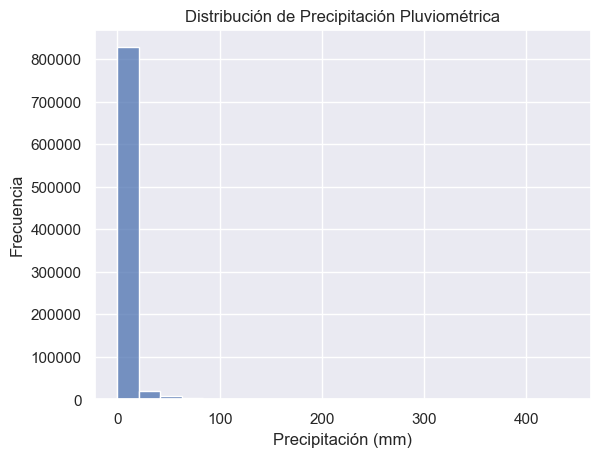

In [23]:
sns.histplot(df["precipitacion_pluviometrica"].dropna())
plt.title("Distribución de Precipitación Pluviométrica")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.show()

Como vemos que los valores están muy dispersos a la izquierda, decidimos transformarlos para que el futuro modelo funcione mejor. En lugar de usar StandardScaler, aplicamos una transformación logarítmica seguida de Min-Max, ya que nuestros datos de precipitación están muy sesgados: la mayoría de los días registran 0 mm y solo unos pocos presentan lluvias extremas. Con el log reducimos la asimetría y comprimimos esos valores altos, y luego con Min-Max llevamos todo a un rango 0–1, logrando que la escala sea más interpretable y útil para nuestros modelos sin que la mayor parte de los datos quede concentrada en un solo valor.

In [65]:
col_log = np.log1p(df["precipitacion_pluviometrica"])  # log(1+x)
df["precipitacion_log_norm"] = (col_log - col_log.min()) / (col_log.max() - col_log.min())

df.precipitacion_log_norm.describe()


count    859006.000000
mean          0.062890
std           0.150031
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: precipitacion_log_norm, dtype: float64

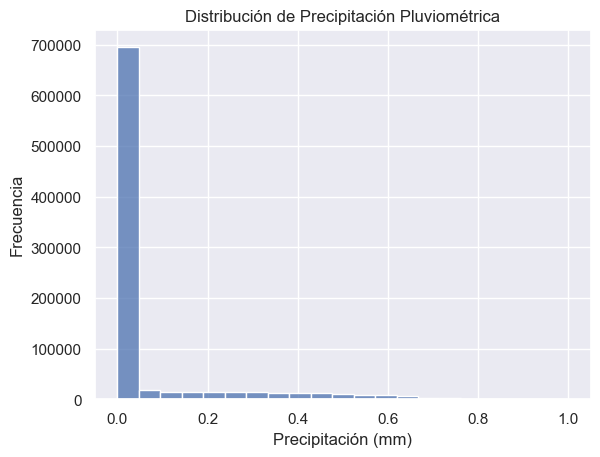

In [66]:
sns.histplot(df["precipitacion_log_norm"].dropna())
plt.title("Distribución de Precipitación Pluviométrica")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.show()

Con el fin de imputar valores a los campos nulos, queremos ver los registros que no son nulos pero que tienen valores faltantes antes o después en la serie, de manera de poder estimar dichos valores intermedios a partir de la tendencia de los datos existentes. Para esto utilizamos interpolación, que nos permite calcular valores aproximados manteniendo la continuidad de la variable en lugar de repetir el último dato válido. En particular, empleamos el método spline con un orden de 2, ya que nos ofrece una curva suavizada que captura mejor las variaciones naturales de la serie sin ser tan rígida como la lineal ni tan oscilante como polinomios de orden mayor, logrando un equilibrio entre suavidad y realismo en los valores imputados.

In [67]:
df.precipitacion_log_norm = df.precipitacion_log_norm.interpolate(method='spline', order=2)
df.precipitacion_log_norm.describe()

count    923866.000000
mean          0.062604
std           0.144680
min           0.000000
25%           0.000000
50%           0.000000
75%           0.043068
max           1.000000
Name: precipitacion_log_norm, dtype: float64

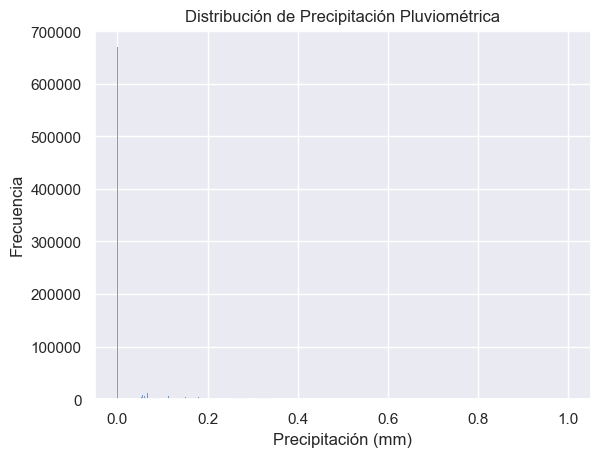

In [70]:
sns.histplot(df["precipitacion_log_norm"])
plt.title("Distribución de Precipitación Pluviométrica")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.show()

En nuestro caso realizamos la interpolación después de haber estandarizado los datos, ya que el modelo trabajará únicamente en ese espacio transformado y no necesitábamos preservar la interpretación física de la variable en milímetros de lluvia. De esta forma, logramos que los valores imputados sigan la misma escala que el resto del dataset ya normalizado, manteniendo la coherencia numérica dentro del proceso de modelado y evitando inconsistencias al entrenar los algoritmos.

##### `direccion_viento_1000cm` y `direccion_viento_200cm`

In [47]:
df.columns

Index(['fecha', 'id_estacion', 'precipitacion_pluviometrica',
       'temperatura_abrigo_150cm_minima', 'temperatura_abrigo_150cm_maxima',
       'temperatura_abrigo_150cm', 'humedad_media_8_14_20', 'rocio_medio',
       'tesion_vapor_media', 'radiacion_global', 'heliofania_efectiva',
       'heliofania_relativa', 'velocidad_viento_200cm_media',
       'velocidad_viento_1000cm_media', 'precipitacion_pluviometrica_esc',
       'precipitacion_log_norm'],
      dtype='object')

In [46]:
df[['direccion_viento_1000cm', 'direccion_viento_200cm']].value_counts()

KeyError: "None of [Index(['direccion_viento_1000cm', 'direccion_viento_200cm'], dtype='object')] are in the [columns]"

Cómo se observa, tiene muchos valores 'vacios'. A estos campos los voy a reemplazar por valores nulos para despues modificar todos estos juntos.

Columnas `humedad_media` y `humedad_media_8_14_20`

In [55]:
cond = (
    (df["humedad_media"].isnull() & df["humedad_media_8_14_20"].notnull()) |
    (df["humedad_media"].notnull() & df["humedad_media_8_14_20"].isnull())
)

filtrado_humedad = df.loc[cond, ["humedad_media", "humedad_media_8_14_20"]]

abs(filtrado_humedad.humedad_media_8_14_20 - filtrado_humedad.humedad_media)

44       NaN
63       NaN
68       NaN
69       NaN
70       NaN
          ..
923848   NaN
923851   NaN
923852   NaN
923858   NaN
923864   NaN
Length: 472524, dtype: float64

In [ ]:
humedad_notna = df[["humedad_media", "humedad_media_8_14_20"]].dropna()

np.abs(humedad_notna.humedad_media / humedad_notna.humedad_media_8_14_20).mean()

# lo hago con una division para asi obtener la razon relativa, que da una proporción: cuánto vale una respecto a la otra.
# me sirve más que hacerlo con una resta, que obtendria la diferencia absoluta entre una variable y otra.


np.float64(1.0756318358333181)

Aparentemente, las columnas difieren en promedio alrededor de un 1%, lo cual es un valor aceptable y no representa una gran diferencia. Con esta información, cuando alguna de las dos columnas tenga un valor nulo pero la otra no, se puede imputar el valor faltante utilizando la columna disponible, ya que ambas muestran una alta consistencia entre sí.

In [72]:
40/1.0756318358333181

37.187445246087414

In [ ]:
filtrado_humedad

,humedad_media,humedad_media_8_14_20
44,NaN,73.0
63,NaN,0.0
68,NaN,40.0
69,NaN,60.0
70,NaN,49.0
...,...,...
923848,NaN,45.0
923851,NaN,32.0
923852,NaN,44.0
923858,NaN,60.0


In [ ]:
import numpy as np
import pandas as pd

def imputar_por_relacion(df, col1, col2):
    """
    Imputa valores nulos entre dos columnas altamente correlacionadas
    usando la razón relativa promedio.

    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame con las columnas.
    col1, col2 : str
        Nombres de las columnas a comparar.

    Retorna
    -------
    pd.DataFrame
        DataFrame con las imputaciones realizadas.
    """
    
    # Filtrar casos donde ambas columnas NO son nulas
    notna = df[[col1, col2]].dropna()
    
    # Calcular la razón relativa promedio
    ratio = np.abs(notna[col1] / notna[col2]).mean()
    
    # Crear copia del df para no modificar el original
    df_copy = df.copy()
    
    # Imputar valores faltantes en col1 con col2 ajustado
    df_copy.loc[df_copy[col1].isna() & df_copy[col2].notna(), col1] = \
        df_copy.loc[df_copy[col1].isna() & df_copy[col2].notna(), col2] * ratio
    
    # Imputar valores faltantes en col2 con col1 ajustado
    df_copy.loc[df_copy[col2].isna() & df_copy[col1].notna(), col2] = \
        df_copy.loc[df_copy[col2].isna() & df_copy[col1].notna(), col1] / ratio
    
    return df_copy
